In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import rasterio

## Notebook to create SFR obs from two stream stats gates

In [2]:
stream_stats_file = '../processed_data/NWIS_DV_STREAMSTATS_INFO.csv'
bound_file = '../source_data/Shapefiles/Extents/Model_Extent_HUC12.shp'

In [3]:
df = pd.read_csv(stream_stats_file)
gdf = gp.GeoDataFrame(df, crs="EPSG:4326", geometry=gp.points_from_xy(x=df['Longitude (degrees NAD83)'], y=df['Latitude (degrees NAD83)']))
gdf = gdf.to_crs(epsg=5070)
gdf

,site_id,Latitude (degrees NAD83),Longitude (degrees NAD83),Mean_Annual_Flow_cfs,Stand_Dev_of_Mean_Annual_Flow,Average_BFI_value,geometry
0,1366650,41.71426,-74.38905,101.0,35.0,0.502,POINT (inf inf)
1,1436500,41.75676,-74.59738,149.0,103.0,0.522,POINT (1751943.938 2281816.688)


In [4]:
bound = gp.read_file(bound_file)
bound = bound.to_crs(epsg=5070)

<AxesSubplot:>

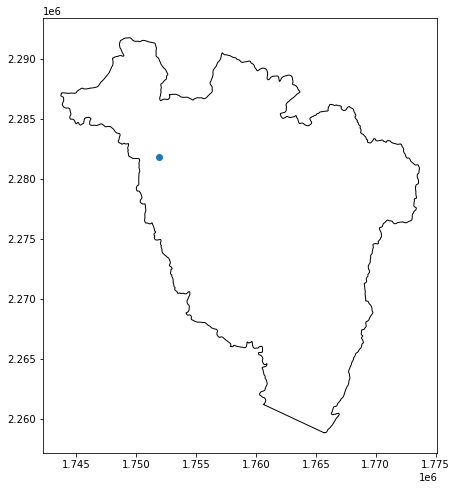

In [5]:
#  plot to make sure coords look right
fig, ax = plt.subplots(figsize=(8,8))
bound.plot(fc='none', ec='k', ax=ax)
gdf.plot(ax=ax)

In [6]:
#  calculate baseflow using mean annual flow and stream stats BFI
gdf['Mean_Annual_BFI_baseflow_cfs'] = gdf['Mean_Annual_Flow_cfs'] * gdf['Average_BFI_value']

In [7]:
#  make x and y cols
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

In [8]:
gdf

,site_id,Latitude (degrees NAD83),Longitude (degrees NAD83),Mean_Annual_Flow_cfs,Stand_Dev_of_Mean_Annual_Flow,Average_BFI_value,geometry,Mean_Annual_BFI_baseflow_cfs,x,y
0,1366650,41.71426,-74.38905,101.0,35.0,0.502,POINT (inf inf),50.702,inf,inf
1,1436500,41.75676,-74.59738,149.0,103.0,0.522,POINT (1751943.938 2281816.688),77.778,1.751944e+06,2.281817e+06


In [9]:
#  write as sfr obs file
gdf.to_csv('../processed_data/NWIS_DV_STREAMSTATS_SITES.csv')